## BOW 만들기

In [3]:
'''
Bow: 단어의 순서 고려 x, 단어의 빈도수를 기반으로 만든 행렬
1) 단어 추출 → 단어에 대해 정수 인덱스 설정
2) 단어의 등장 횟수를 저장한 벡터를 생성
'''

'\nBow: 단어의 순서 고려 x, 단어의 빈도수를 기반으로 만든 행렬\n1) 단어 추출 → 단어에 대해 정수 인덱스 설정\n2) 단어의 등장 횟수를 저장한 벡터를 생성\n'

In [4]:
text='정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다'

In [5]:
# 마침표 제거
import re
re.sub('\.','',text)

'정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다'

In [6]:
from konlpy.tag import Okt

In [7]:
okt=Okt()

In [8]:
token = okt.morphs(text)

In [9]:
token

['정부', '가', '발표', '하는', '물가상승률', '과', '소비자', '가', '느끼는', '물가상승률', '은', '다르다']

In [10]:
# word2index에 BOW 저장
word2index={} # {정부:1, 단어:index번호}
bow=[] # [1, 단어빈도수, 단어빈도수, ... ]

In [11]:
for v in token:
    if v not in word2index.keys():
        word2index[v]=len(word2index) # word2index의 크기로 넘버링을 하면 좋겠네.
        bow.insert(len(word2index)-1,1) # bow의 len(word2index)-1 위치에 1을 넣어라.
    else:
        idx = word2index.get(v)
        bow[idx]=bow[idx]+1
print(word2index)
print(bow)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [12]:
'''
전체문서(n개 문서)={d1,d2, ... , dn}
단어집합(m개 단어)={t1,t2, ... , tm}
Xij = 문서 di에 있는 단어tj의 출현 빈도수
'''

'\n전체문서(n개 문서)={d1,d2, ... , dn}\n단어집합(m개 단어)={t1,t2, ... , tm}\nXij = 문서 di에 있는 단어tj의 출현 빈도수\n'

In [13]:
from sklearn.feature_extraction import DictVectorizer

In [14]:
v=DictVectorizer(sparse=False) # True: 텍스트 데이터를 압축해서 bow 생성(메모리 효율↑), #
# False: 데이터 바로 확인 가능
d=[{'a':1,'b':2},{'b':3,'c':1}] # [문서1, 문서2]   {단어1:빈도수, 단어2:빈도수}
print(v.fit_transform(d)) # bow가 만들어 짐.
print(v.feature_names_)

[[1. 2. 0.]
 [0. 3. 1.]]
['a', 'b', 'c']


In [15]:
# bow에 새로운 문서 데이터를 전달하여 변환
print(v.transform({'c':5,'d':2}))

[[0. 0. 5.]]


In [16]:
'''
CountVectorize
문서 → 토큰(단어) 변환 → 토큰의 빈도 수 계산 → BOW 벡터 생성
'''

'\nCountVectorize\n문서 → 토큰(단어) 변환 → 토큰의 빈도 수 계산 → BOW 벡터 생성\n'

In [17]:
corpus=['This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
v=CountVectorizer()
v.fit(corpus)
v.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [20]:
v.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]], dtype=int64)

In [21]:
# 새로운 문서 입력 → bow 변환
v.transform(["This is the second document"]).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

In [22]:
v.transform(["Something new"]).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [23]:
v=CountVectorizer(stop_words=['and','is','the','this'])
v.fit(corpus)
v.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [24]:
v=CountVectorizer()
v.fit(corpus)
v.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [25]:
v=CountVectorizer(analyzer='char')
v.fit(corpus)
v.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [26]:
v=CountVectorizer(token_pattern="t\w+") # 정규표현식 활용
v.fit(corpus)
v.vocabulary_

{'this': 2, 'the': 0, 'third': 1}

In [27]:
# ngram_range=(n,m) 최소 n개 최대 m개의 단어들을 묶어서 1개의 단어로 취급하여 bow 생성
v=CountVectorizer(ngram_range=(1,2),token_pattern="t\w+") # 최소2, 최대2 → n값이 2인 gram(bi-gram)
v.fit(corpus)
v.vocabulary_

{'this': 3, 'the': 0, 'this the': 4, 'third': 2, 'the third': 1}

In [28]:
v=CountVectorizer(min_df=2,max_df=4) # document frequency 2번 이상 4번 이하 
# second의 경우 한 문서에서 2번 나와서 요건 충족 X
v.fit(corpus)
v.vocabulary_, v.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'third'})

## tf-idf

In [29]:
# tf - term frequency : 단어의 출현 빈도수
# idf - inverse document frequency
# dtm에서는 각각의 단어에 대한 중요도가 없음
# tf-idf(단어빈도-역문서빈도): dtm에 있는 각 단어들마다 중요도를 계산
# dtm을 생성한 후, tf-idf 생성!

# tf(d,t): 문서 d에서 단어 t의 등장 횟수
# df(t): 단어 t가 등장한 문서의 갯수(여러번 단어가 등장한 경우에도 1로 카운트)
# idf(d,t): df(t)의 반비례하는 수

# n: 전체 문서의 갯수
# idf(d,t) = log( n / (1+df(t)) )

# n/(1+df(t))

# ex) n=1,000,000
# idf(dt) = 1,000,000 / 1 = 1,000,000
# idf(dt) = 1,000,000 / 100 = 1,000
# idf(dt) = 1,000,000 / 200 = 500
# idf값이 너무 커진다! → 로그를 취해서 해결.
# 
# ex) n=1,000,000
# idf(dt) = log(1,000,000 / 1) = 6
# idf(dt) = log(1,000,000 / 100) = 4
# idf(dt) = log(1,000,000 / 100,000) = 1
# tfidf는 모든 문서에서 자주 등장하는 단어라면 중요도가 낮다고 판단.
# 특정 문서에서만 등장하는 단어라면 중요도가 높다고 판단
# tfidf값이 낮으면 단어의 중요도가 낮다.

In [30]:
import pandas as pd
from math import log

In [31]:
# log는 자연로그로하는군.(ln)
log(4/(2+1))

0.28768207245178085

In [32]:
docs=[
    '먹고 싶은 사과',
    '먹고 싶은 바나나',
    '길고 노란 바나나 바나나',
    '저는 과일이 좋아요'    
]
# 4개의 문서.

In [ ]:
# TF, IDF, TFIDF calculation
# sentences → TF(DTM) → IDF(ln( n/(1+df)) → TF * IDF (element wise product)

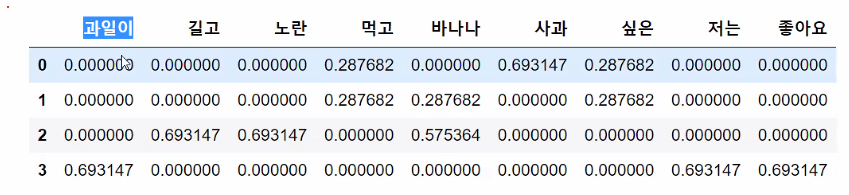


In [ ]:
# TF * IDF의 의미?
# 각 단어가 어느 문서에서 중요하게 사용되는지? 

In [34]:
# 싸이킷런 tfidf

In [35]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vec = CountVectorizer()

In [41]:
vec.fit_transform(corpus).toarray() # 코퍼스에서 단어의 빈도수를 추출!! DTM 

array([[0, 1, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0]], dtype=int64)

In [42]:
vec.vocabulary_

{'you': 7,
 'know': 1,
 'want': 5,
 'your': 8,
 'love': 3,
 'like': 2,
 'what': 6,
 'should': 4,
 'do': 0}

### 사이킷런의 tfidf 클래스를 사용하여 tfidf 행렬을 구해보자.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tv=TfidfVectorizer()

In [47]:
tfidfv = tv.fit(corpus)

In [48]:
tfidfv.transform(corpus).toarray()

array([[0.        , 0.46735098, 0.        , 0.46735098, 0.        ,
        0.46735098, 0.        , 0.35543247, 0.46735098],
       [0.        , 0.        , 0.79596054, 0.        , 0.        ,
        0.        , 0.        , 0.60534851, 0.        ],
       [0.57735027, 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.57735027, 0.        , 0.        ]])

In [49]:
tfidfv.vocabulary_

{'you': 7,
 'know': 1,
 'want': 5,
 'your': 8,
 'love': 3,
 'like': 2,
 'what': 6,
 'should': 4,
 'do': 0}

#### 옵션 추가

In [50]:
tv=TfidfVectorizer(min_df=2) # df: document frequency

In [54]:
tv=TfidfVectorizer(analyzer='char') # df: document frequency

In [58]:
tv=TfidfVectorizer(ngram_range=(2,3)) # ngram에서 n을 2와 3모두 활용

In [59]:
tfidfv = tv.fit(corpus)

In [60]:
tfidfv.transform(corpus).toarray()

array([[0.37796447, 0.37796447, 0.        , 0.        , 0.37796447,
        0.37796447, 0.        , 0.        , 0.37796447, 0.37796447,
        0.37796447],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.57735027, 0.57735027, 0.        , 0.        ,
        0.        ]])

In [61]:
tfidfv.vocabulary_

{'you know': 8,
 'know want': 0,
 'want your': 4,
 'your love': 10,
 'you know want': 9,
 'know want your': 1,
 'want your love': 5,
 'like you': 2,
 'what should': 6,
 'should do': 3,
 'what should do': 7}

In [62]:
import numpy as np

In [63]:
doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))

In [64]:
docInput=np.array((1,1,0,1))

In [89]:
def dist(x,y):
    return (np.sum((x-y)**2))
    
print(dist(doc1,docInput))
print(dist(doc2,docInput))
print(dist(doc3,docInput))

5
10
6


## 자카드 유사도

In [ ]:
# 자카드 유사도 알고리즘: 합집합에서 교집합의 비율을 구하자.
# J(doc1,doc2) = (doc1과 doc2의 교집합) / (doc1과 doc2의 합집합)

In [67]:
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

In [70]:
tok1 = doc1.split()
tok2 = doc2.split()

In [71]:
# 합집합
set(tok1) # 유일한 단어들만 출력

{'apple', 'banana', 'card', 'everyone', 'holder', 'like', 'likey', 'watch'}

In [72]:
set(tok2)

{'apple', 'banana', 'coupon', 'love', 'passport', 'you'}

In [75]:
# 합집합 union
union = set(tok1).union(set(tok2))
union

{'apple',
 'banana',
 'card',
 'coupon',
 'everyone',
 'holder',
 'like',
 'likey',
 'love',
 'passport',
 'watch',
 'you'}

In [76]:
# 교집합 intersection
intersection = set(tok1).intersection(set(tok2))
intersection

{'apple', 'banana'}

In [78]:
print("자카드 유사도: ",len(intersection) / len(union))

자카드 유사도:  0.16666666666666666


In [86]:
doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))


In [79]:
# 코사인 유사도
from sklearn.metrics.pairwise import cosine_similarity

In [83]:
from numpy import dot
from numpy.linalg import norm

In [90]:
def cos_sim(a,b):
    return dot(a,b) / norm(a)*norm(b)

print(cos_sim(doc1,docInput))
print(cos_sim(doc2,docInput))
print(cos_sim(doc3,docInput))

2.7774602993176543
1.7888543819998315
2.4019223070763074


In [81]:
docs=[doc1,doc2,doc3]

In [82]:
for doc in docs:
    cos_sim = cosine_similarity(docInput.reshape(1,-1),doc.reshape(1,-1))
    print(f'입력 문서와 {doc} 코사인 유사도 : ',cos_sim[0])

AttributeError: 'str' object has no attribute 'reshape'